In [1]:
from glob import glob
import nibabel as nb
import numpy as np
from scipy import stats

In [2]:
targets = glob("..\coordinates_hcp_train27_no_discriminator_test\images\*targets.nii.gz")

In [8]:
def evaluate(model):
    targets = glob("../" + model + "/images/*targets.nii.gz")
    r_values = []
    percentile_values = []
    for target in targets:
        target_values = nb.load(target).get_data().flatten()
        output_values = nb.load(target.replace("targets", "outputs")).get_data().flatten()
        r_value = np.corrcoef(target_values, output_values)[0, 1]
        r_values.append(r_value)
        print(target)
        print(r_value)
        null_r_values = []
#         for other_target in targets:
#             other_target_values = nb.load(other_target).get_data().flatten()
#             r_value = np.corrcoef(other_target_values, output_values)[0, 1]
#             null_r_values.append(r_value)
#         percentile = stats.percentileofscore(null_r_values, r_value)
#         print(percentile)
#         percentile_values.append(percentile)
    print("mean R: "+ str(np.array(r_values).mean()))
    print("mean percentile score: "+ str(np.array(percentile_values).mean()))

In [10]:
evaluate("coordinates_hcp_train27_no_discriminator_test")

../coordinates_hcp_train27_no_discriminator_test/images\118730_SOCIAL-targets.nii.gz
0.316548850441
../coordinates_hcp_train27_no_discriminator_test/images\118932_EMOTION-targets.nii.gz
0.125522896034
../coordinates_hcp_train27_no_discriminator_test/images\118932_FACE-SHAPE-targets.nii.gz
0.207499913119
../coordinates_hcp_train27_no_discriminator_test/images\118932_GAMBLING-targets.nii.gz
0.143950264844
../coordinates_hcp_train27_no_discriminator_test/images\118932_LANGUAGE-targets.nii.gz
0.485626644322
../coordinates_hcp_train27_no_discriminator_test/images\118932_RELATIONAL-targets.nii.gz
-0.098707031236
../coordinates_hcp_train27_no_discriminator_test/images\118932_SOCIAL-targets.nii.gz
0.270737288402
../coordinates_hcp_train27_no_discriminator_test/images\119833_EMOTION-targets.nii.gz
0.16878997126
../coordinates_hcp_train27_no_discriminator_test/images\119833_GAMBLING-targets.nii.gz
0.451697926314
../coordinates_hcp_train27_no_discriminator_test/images\119833_LANGUAGE-targets.nii.

C:\Users\filo\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: Mean of empty slice.
C:\Users\filo\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
evaluate("coordinates_hcp_train27_no_discriminator_test")

../coordinates_hcp_train27_no_discriminator_test/images\118730_SOCIAL-targets.nii.gz
0.316548850441
56.25
../coordinates_hcp_train27_no_discriminator_test/images\118932_EMOTION-targets.nii.gz
0.125522896034
81.25
../coordinates_hcp_train27_no_discriminator_test/images\118932_FACE-SHAPE-targets.nii.gz
0.207499913119
93.75
../coordinates_hcp_train27_no_discriminator_test/images\118932_GAMBLING-targets.nii.gz
0.143950264844
37.5
../coordinates_hcp_train27_no_discriminator_test/images\118932_LANGUAGE-targets.nii.gz
0.485626644322
56.25
../coordinates_hcp_train27_no_discriminator_test/images\118932_RELATIONAL-targets.nii.gz
-0.098707031236
46.875
../coordinates_hcp_train27_no_discriminator_test/images\118932_SOCIAL-targets.nii.gz
0.270737288402
53.125
../coordinates_hcp_train27_no_discriminator_test/images\119833_EMOTION-targets.nii.gz
0.16878997126
81.25
../coordinates_hcp_train27_no_discriminator_test/images\119833_GAMBLING-targets.nii.gz
0.451697926314
46.875
../coordinates_hcp_train27_n

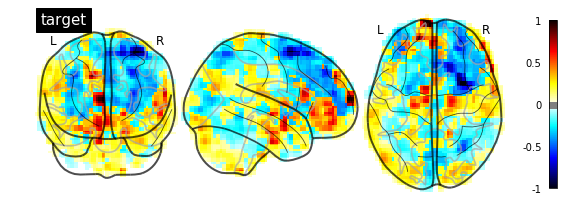

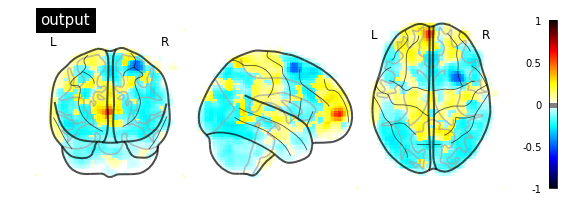

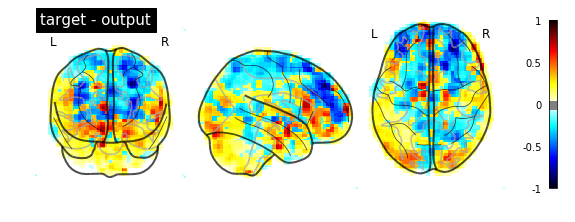

In [28]:
from nilearn import plotting
from nilearn import image
%matplotlib inline
plotting.plot_glass_brain("../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-targets.nii.gz", 
                          colorbar=True, title="target", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)
plotting.plot_glass_brain("../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-outputs.nii.gz", 
                          colorbar=True, title="output", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)
diff = image.math_img("a-b", 
                      a="../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-targets.nii.gz", 
                      b="../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-outputs.nii.gz")
plotting.plot_glass_brain(diff, 
                          colorbar=True, title="target - output", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)

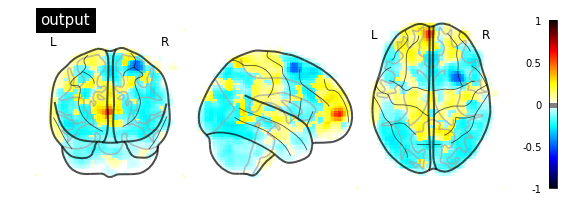

In [29]:
plotting.plot_glass_brain("../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-outputs.nii.gz", 
                          colorbar=True, title="output", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)

C:\Users\filo\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


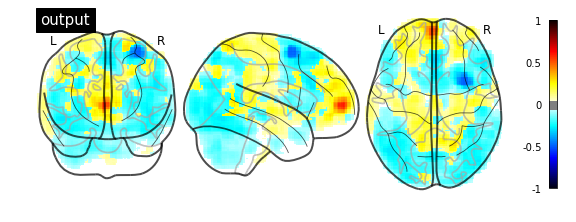

In [99]:
mni_shape_mm = np.array([148.0, 184.0, 156.0])
target_resolution_mm = 1.5
target_shape = np.ceil(mni_shape_mm/target_resolution_mm).astype(np.int8)
target_affine = np.array([[   4.,    0.,    0.,  -75.],
                          [   0.,    4.,    0., -105.],
                          [   0.,    0.,    4.,  -70.],
                          [   0.,    0.,    0.,    1.]])
target_affine[0,0] = target_affine[1,1] = target_affine[2,2] = target_resolution_mm
new_nii = image.resample_img("../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-outputs.nii.gz", 
                   target_affine=target_affine, target_shape=target_shape)
plotting.plot_glass_brain(new_nii, 
                          colorbar=True, title="output", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)


In [101]:
image.resample_img?

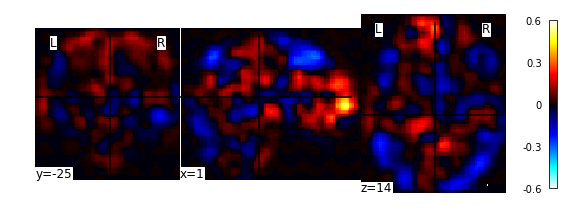

In [100]:
plotting.plot_stat_map(new_nii)

In [38]:
np.diag([4,4,4,1])
plotting.plot_glass_brain("../coordinates_hcp_train27_no_discriminator_test/images/118932_GAMBLING-outputs.nii.gz", 
                          colorbar=True, title="output", symmetric_cbar=True, vmin=-1, vmax=1, plot_abs=False)

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 1]])

In [42]:
evaluate("coordinates_hcp_train26_test")

../coordinates_hcp_train26_test/images\118730_SOCIAL-targets.nii.gz
0.264526296573
62.5
../coordinates_hcp_train26_test/images\118932_EMOTION-targets.nii.gz
0.148605568023
84.375
../coordinates_hcp_train26_test/images\118932_FACE-SHAPE-targets.nii.gz
0.19675543158
96.875
../coordinates_hcp_train26_test/images\118932_GAMBLING-targets.nii.gz
0.179263638879
43.75
../coordinates_hcp_train26_test/images\118932_LANGUAGE-targets.nii.gz
0.487860796099
71.875
../coordinates_hcp_train26_test/images\118932_RELATIONAL-targets.nii.gz
0.0178192077012
56.25
../coordinates_hcp_train26_test/images\118932_SOCIAL-targets.nii.gz
0.165532816707
50.0
../coordinates_hcp_train26_test/images\119833_EMOTION-targets.nii.gz
0.192313267087
87.5
../coordinates_hcp_train26_test/images\119833_GAMBLING-targets.nii.gz
0.371031001464
46.875
../coordinates_hcp_train26_test/images\119833_LANGUAGE-targets.nii.gz
0.30768629494
59.375
../coordinates_hcp_train26_test/images\119833_SOCIAL-targets.nii.gz
0.238553261902
75.0
../